# Segmentation d’Images avec SAM, DETR et YOLOv8-seg

Ce notebook explore et compare différentes approches de segmentation d’images, en utilisant des modèles de pointe : Segment Anything Model (SAM), DETR (Detection Transformer) et YOLOv8-seg. Il permet de générer, visualiser et sauvegarder des masques de segmentation sur des images complexes.

**Objectif spécifique : décomposer automatiquement une interface utilisateur (UI) en ses composants visuels afin de préparer l’analyse par un modèle VLM (Vision-Language Model), pour ensuite générer une description textuelle du UI et produire le code correspondant à l’interface.**

## Objectifs

- Appliquer la segmentation panoptique avec DETR (transformers).
- Utiliser le modèle SAM (Segment Anything Model) pour générer des masques à partir de points d’intérêt.
- Tester la segmentation d’objets avec YOLOv8-seg.
- Visualiser, sauvegarder et manipuler les masques générés.
- Comparer les résultats des différentes méthodes sur les mêmes images.

## Pipeline du notebook

1. **Installation et import des dépendances**
   - Installation de `timm`, `transformers`, `ultralytics`, etc.
   - Import des librairies nécessaires (PyTorch, PIL, OpenCV, matplotlib…).

2. **Segmentation panoptique avec DETR**
   - Chargement d’une image.
   - Application du modèle DETR pour obtenir une segmentation panoptique.
   - Visualisation des segments colorés.

3. **Segmentation d’objets avec YOLOv8-seg**
   - Chargement et utilisation du modèle YOLOv8 pour la segmentation d’objets.
   - Visualisation et annotation des résultats.

4. **Segmentation avec SAM (Segment Anything Model)**
   - Chargement du modèle SAM.
   - Génération de masques à partir de points d’intérêt ou d’un pipeline automatique.
   - Visualisation des masques sur l’image d’origine.

5. **Sauvegarde et manipulation des masques**
   - Sauvegarde des masques générés et des images segmentées.
   - Affichage de tous les masques sauvegardés.

6. **Comparaison et visualisation**
   - Affichage côte à côte des résultats des différentes méthodes.
   - Possibilité de traiter des lots d’images.

## Applications

- Segmentation d’images biomédicales, industrielles ou naturelles.
- Décomposition automatique d’interfaces utilisateur (UI) pour l’analyse et la génération de code.
- Annotation automatique pour la création de datasets.
- Comparaison de modèles de segmentation SOTA (state-of-the-art).
- Prétraitement pour des tâches de détection, classification ou analyse d’images.

---

> Ce notebook est un outil polyvalent pour tester, comparer et visualiser rapidement les performances de plusieurs modèles de segmentation avancés sur vos propres images, et pour préparer l’analyse et la génération automatique de code à partir d’interfaces utilisateur.

In [ ]:
!pip install timm

In [ ]:
import io
import requests
from PIL import Image
import torch
import numpy
import torchvision.transforms as T
from transformers import DetrFeatureExtractor, DetrForSegmentation
from transformers.models.detr.feature_extraction_detr import rgb_to_id

url = "/content/Holoffice Download 2024-03-27 14-38-53.png"
image = Image.open(url).convert("RGB")

In [ ]:

feature_extractor = DetrFeatureExtractor.from_pretrained("facebook/detr-resnet-50-panoptic")
model = DetrForSegmentation.from_pretrained("facebook/detr-resnet-50-panoptic")

# prepare image for the model
inputs = feature_extractor(images=image, return_tensors="pt")

# forward pass
outputs = model(**inputs)

# use the `post_process_panoptic` method of `DetrFeatureExtractor` to convert to COCO format
processed_sizes = torch.as_tensor(inputs["pixel_values"].shape[-2:]).unsqueeze(0)
result = feature_extractor.post_process_panoptic(outputs, processed_sizes)[0]

panoptic_seg = Image.open(io.BytesIO(result["png_string"]))
panoptic_seg = numpy.array(panoptic_seg, dtype=numpy.uint8)

panoptic_seg_id = rgb_to_id(panoptic_seg)


Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForSegmentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
`post_process_panoptic is deprecated and will be removed in v5 o

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def create_panoptic_seg_image(panoptic_seg_id, segments_info):
    """
    Crée une image RGB à partir du masque panoptique en utilisant des couleurs uniques pour chaque segment.
    """
    
    panoptic_seg_rgb = np.zeros((panoptic_seg_id.shape[0], panoptic_seg_id.shape[1], 3), dtype=np.uint8)

    for segment_info in segments_info:
        
        color = np.random.randint(0, 255, (3,), dtype=np.uint8)
        
        panoptic_seg_rgb[panoptic_seg_id == segment_info['id']] = color

    return panoptic_seg_rgb


panoptic_seg_rgb = create_panoptic_seg_image(panoptic_seg_id, result['segments_info'])


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Image Originale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(panoptic_seg_rgb)
plt.title('Segmentation Panoptique')
plt.axis('off')

plt.show()


In [ ]:
!nvidia-smi

Fri Mar 29 09:26:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0              26W /  70W |    453MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/201.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image
import os
HOME = os.getcwd()

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='/....' save=true

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

image 1/1 /content/Holoffice Download 2024-03-27 14-38-53.png: 256x640 (no detections), 169.5ms
Speed: 2.6ms preprocess, 169.5ms inference, 56.6ms postprocess per image at shape (1, 3, 256, 640)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
model = YOLO(f'{HOME}/yolov8s-seg.pt')
results = model.predict(source='/....', conf=0.25)


image 1/1 /content/Holoffice Download 2024-03-27 14-38-53.png: 256x640 (no detections), 362.5ms
Speed: 11.3ms preprocess, 362.5ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 640)


In [ ]:
results

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np

image_path = results[0].path
image = Image.open(image_path)
draw = ImageDraw.Draw(image)
boxes = results[0].boxes.xyxy.cpu().numpy()

for box in boxes:
    print(box)
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red', width=2)
    draw.text((box[0], box[1]), fill='red')

tensor([], device='cuda:0', size=(0, 4))


In [ ]:
from PIL import Image
import requests
from transformers import SamModel, SamProcessor



model = SamModel.from_pretrained("facebook/sam-vit-base")
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

model = model.to("cuda")


img_url = '/....'
raw_image = Image.open(img_url).convert("RGB")


input_points = [[[450, 600]]] 


inputs = processor(raw_image, input_points=input_points, return_tensors="pt").to("cuda")
outputs = model(**inputs)


masks = processor.image_processor.post_process_masks(outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())
scores = outputs.iou_scores.cpu()




In [ ]:
from transformers import pipeline
generator =  pipeline("mask-generation", device = 0, points_per_batch = 256)
image_url ="/content/Holoffice Download 2024-03-27 14-38-53.png"
outputs = generator(image_url, points_per_batch = 256)


No model was supplied, defaulted to facebook/sam-vit-huge and revision 997b15 (https://huggingface.co/facebook/sam-vit-huge).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


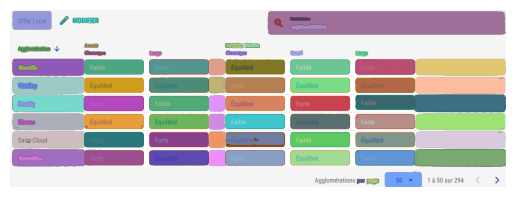

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img_url = '/....'
raw_image = Image.open(img_url).convert("RGB")
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30 / 255, 144 / 255, 255 / 255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


plt.imshow(np.array(raw_image))
ax = plt.gca()
for mask in outputs["masks"]:
    show_mask(mask, ax=ax, random_color=True)
plt.axis("off")
plt.show()


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


masks_folder = 'masks_images'
if not os.path.exists(masks_folder):
    os.makedirs(masks_folder)

def save_mask_and_segmented_image(image_np, mask, index, masks_folder='masks_images', random_color=False):
    
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30 / 255, 144 / 255, 255 / 255, 0.6])

    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    mask_image_contiguous = np.ascontiguousarray(mask_image)

   
    mask_path = os.path.join(masks_folder, f'mask_{index}.png')
    plt.imsave(mask_path, mask_image_contiguous)

    
    segmented_image = np.zeros_like(image_np)
    mask_bool = mask.reshape(h, w).astype(bool)
    for c in range(image_np.shape[2]):  
        segmented_image[..., c] = image_np[..., c] * mask_bool

    
    segmented_image_path = os.path.join(masks_folder, f'segmented_{index}.png')
    Image.fromarray(segmented_image).save(segmented_image_path)


In [ ]:
def save_mask_and_segmented_image(image_np, mask, index, masks_folder='masks_images', random_color=False):
    if not os.path.exists(masks_folder):
        os.makedirs(masks_folder)

    
    rows = np.any(mask, axis=1)
    cols = np.any(mask, axis=0)
    y_min, y_max = np.where(rows)[0][[0, -1]]
    x_min, x_max = np.where(cols)[0][[0, -1]]

    
    mask_cropped = mask[y_min:y_max+1, x_min:x_max+1]

    
    segmented_cropped = image_np[y_min:y_max+1, x_min:x_max+1] * mask_cropped[..., np.newaxis]

    
    segmented_image_path = os.path.join(masks_folder, f'segmented_{index}.png')
    Image.fromarray(segmented_cropped).save(segmented_image_path)


In [ ]:
image_np = np.array(raw_image)
for i, mask in enumerate(outputs["masks"]):
    save_mask_and_segmented_image(image_np, mask, i, masks_folder='masks_images', random_color=True)

In [ ]:
from transformers import pipeline
generator = pipeline("mask-generation", device=0, points_per_batch=256)
image_url = "/content/Holoffice Download 2024-03-27 14-38-53.png"
outputs = generator(image_url, points_per_batch=256)

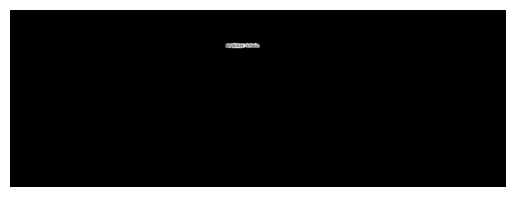

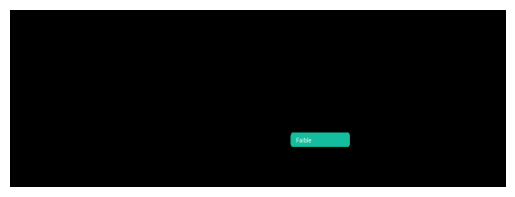

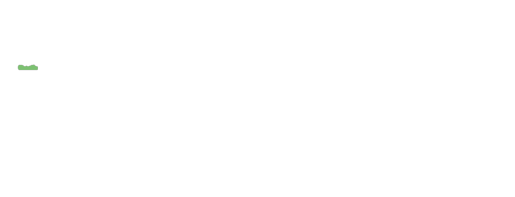

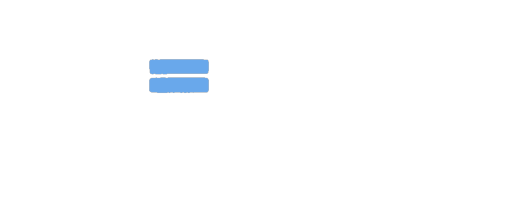

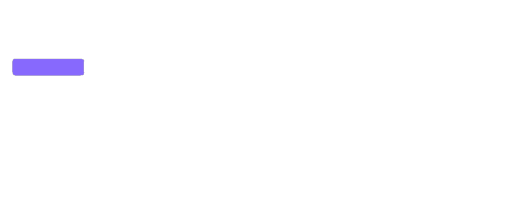

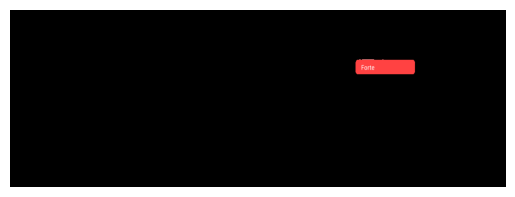

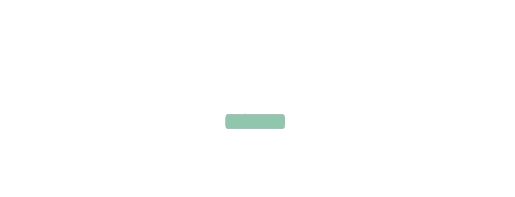

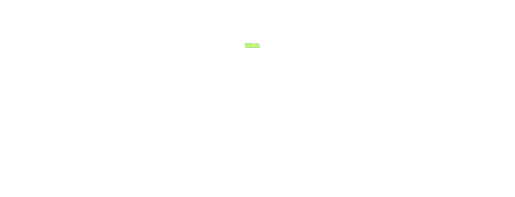

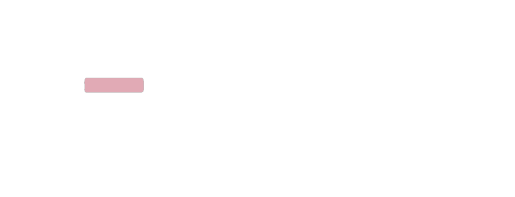

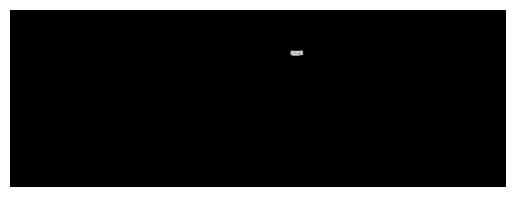

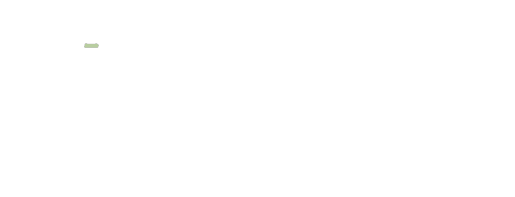

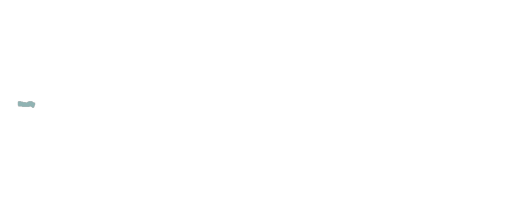

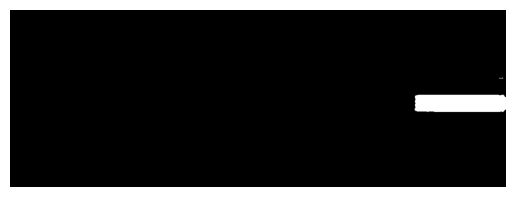

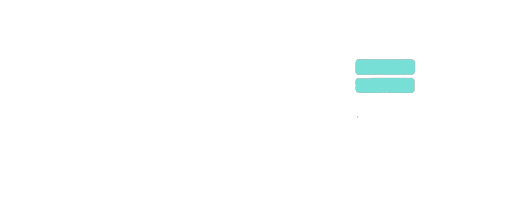

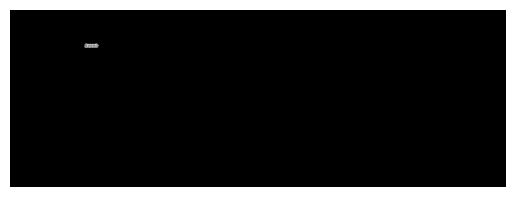

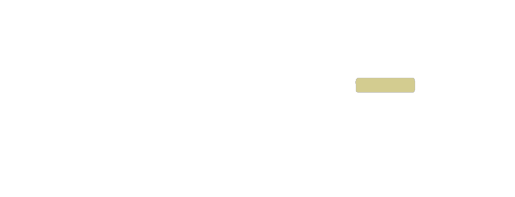

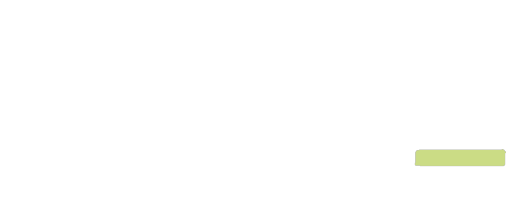

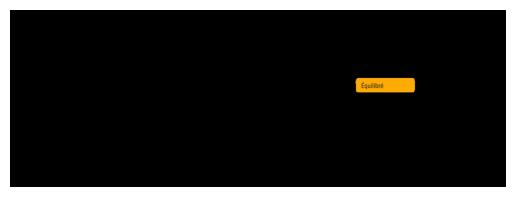

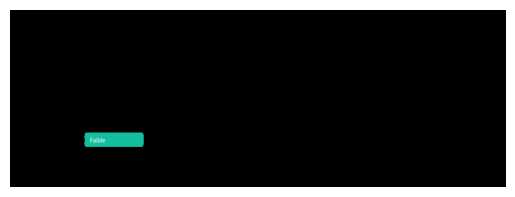

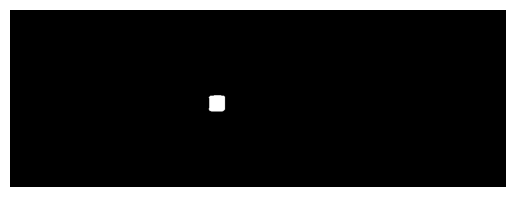

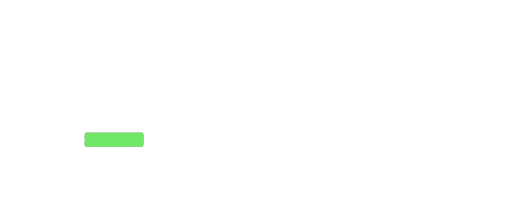

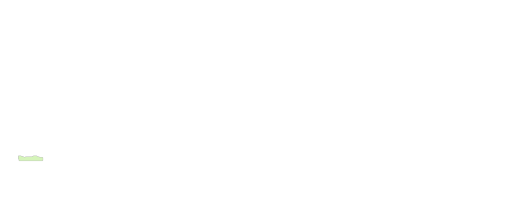

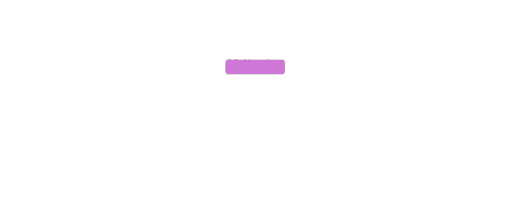

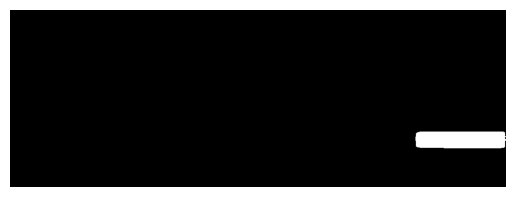

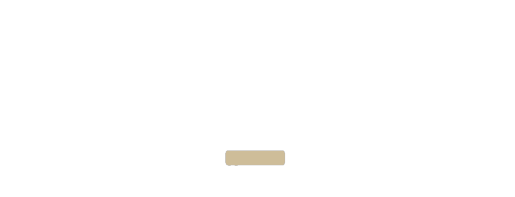

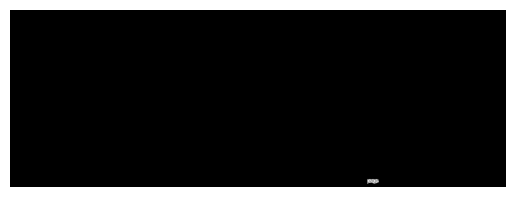

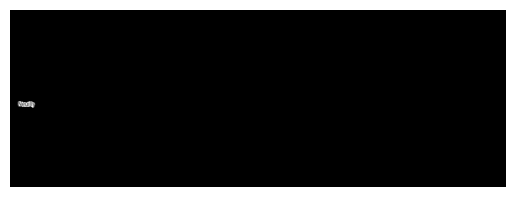

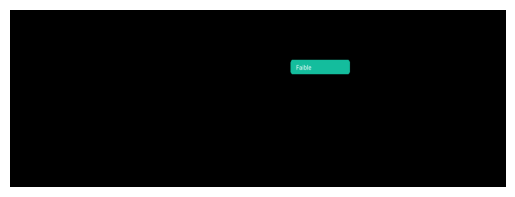

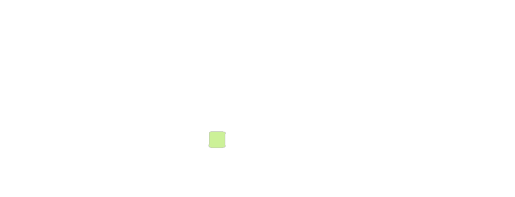

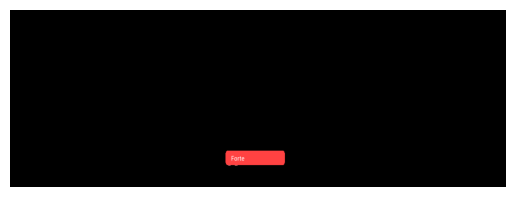

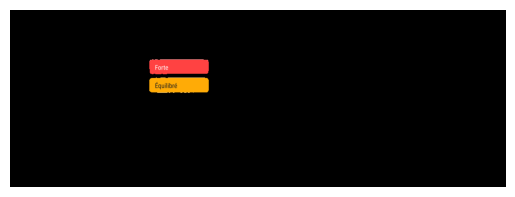

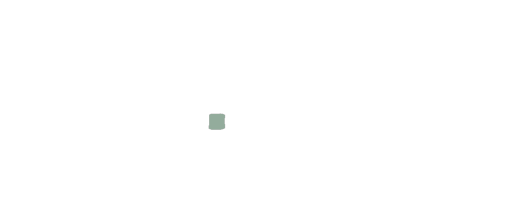

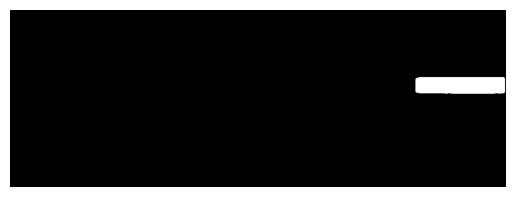

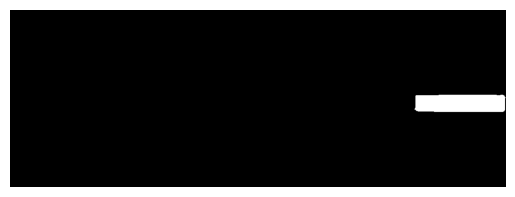

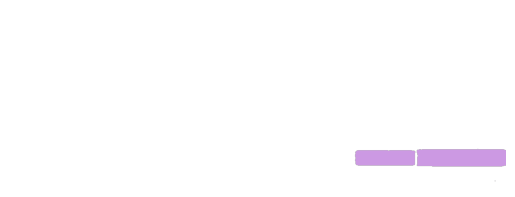

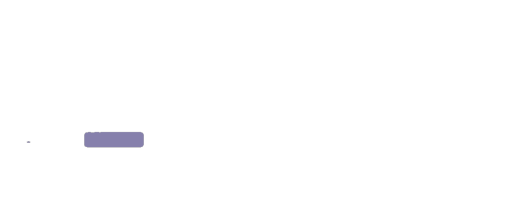

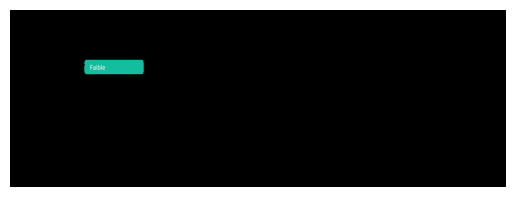

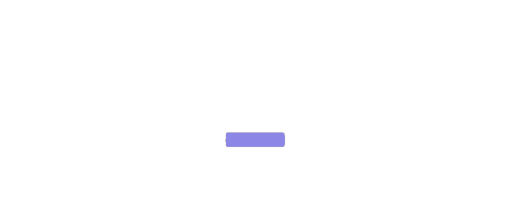

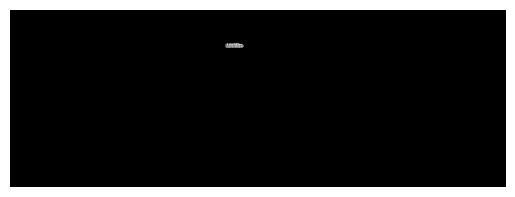

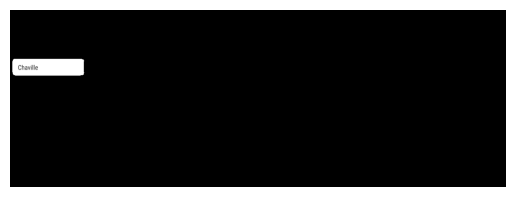

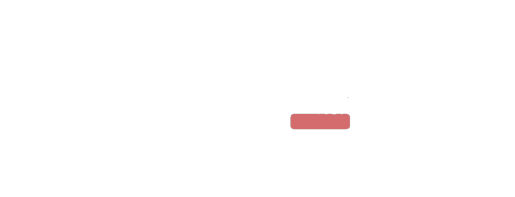

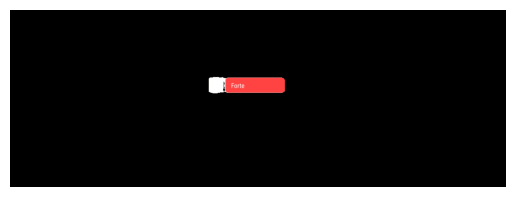

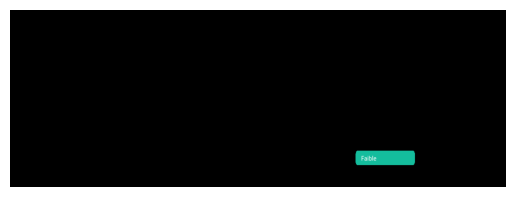

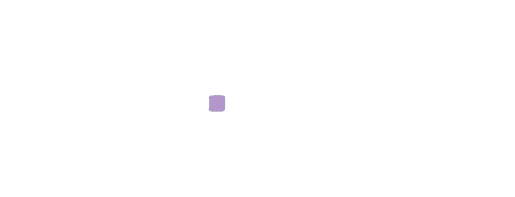

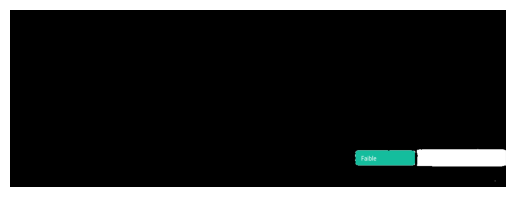

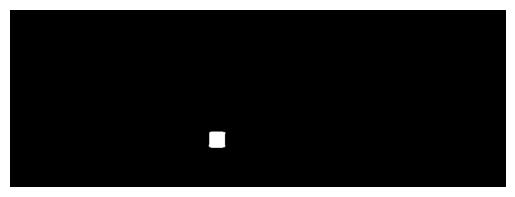

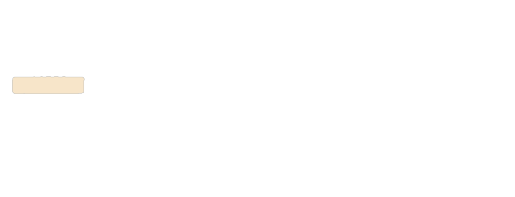

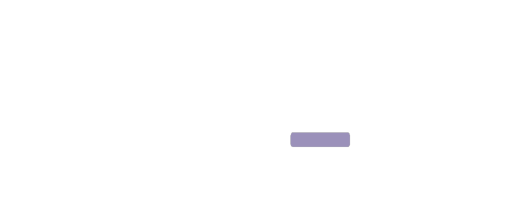

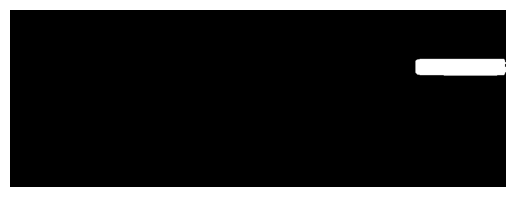

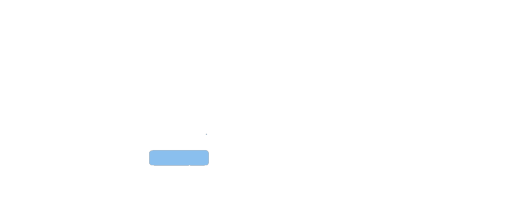

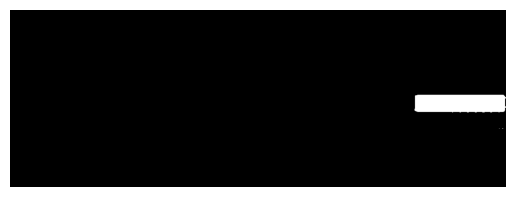

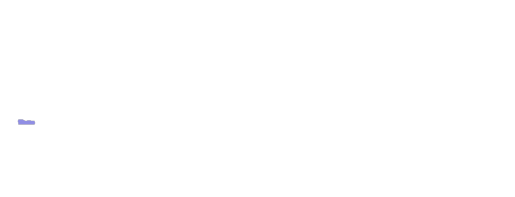

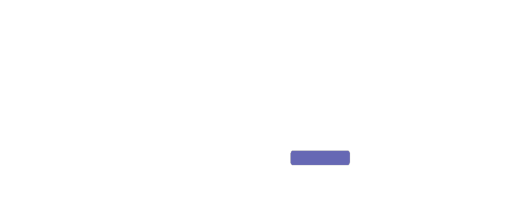

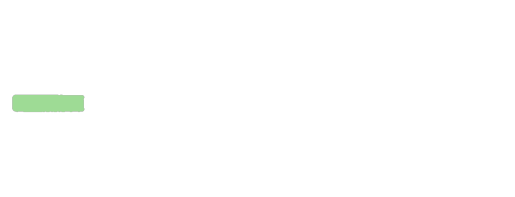

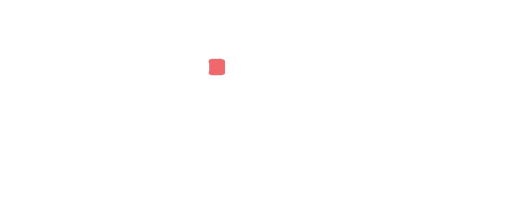

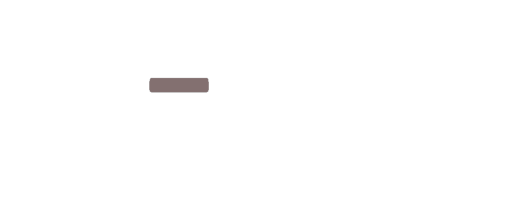

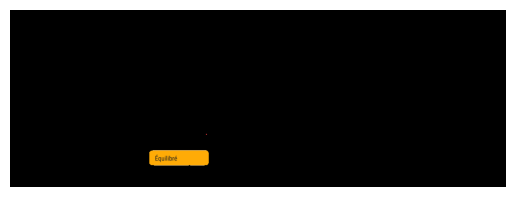

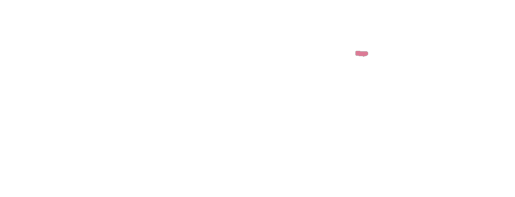

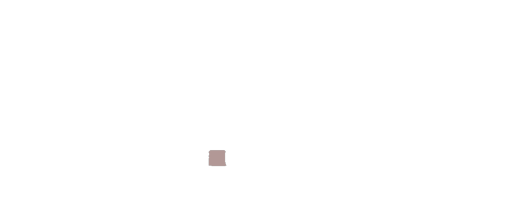

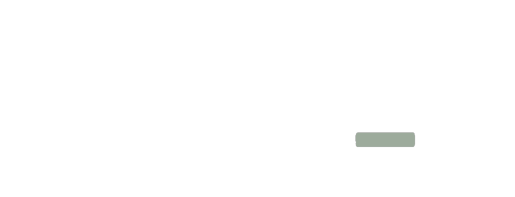

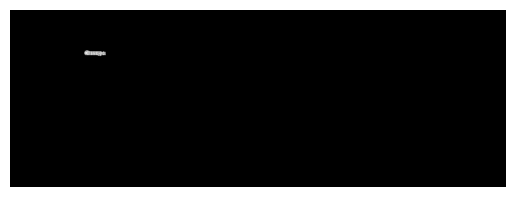

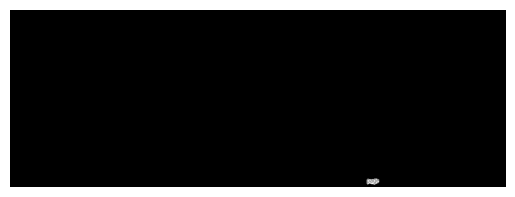

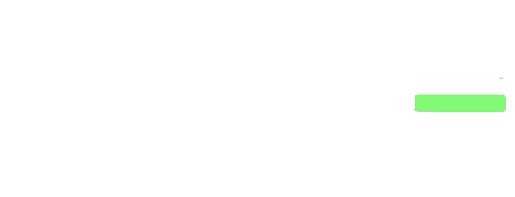

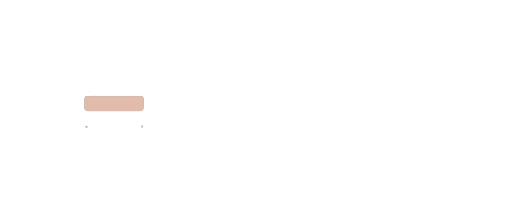

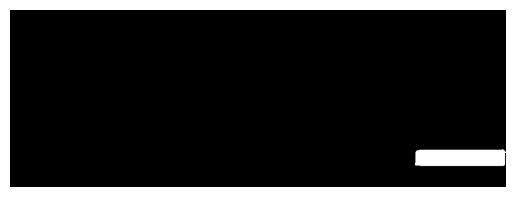

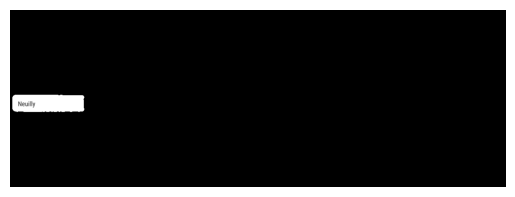

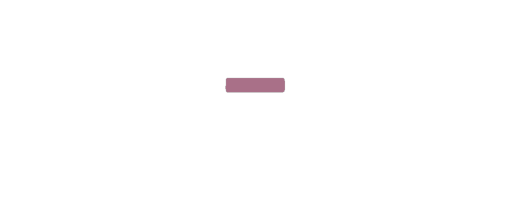

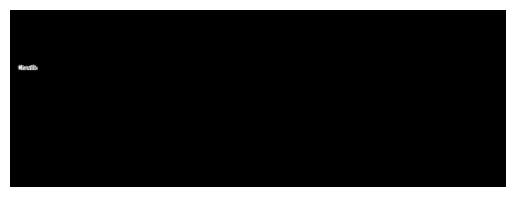

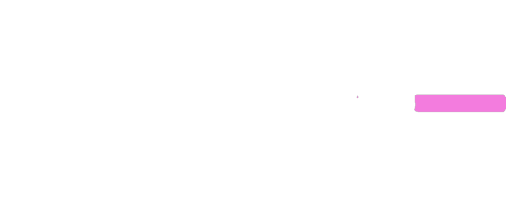

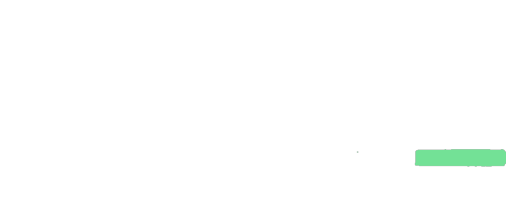

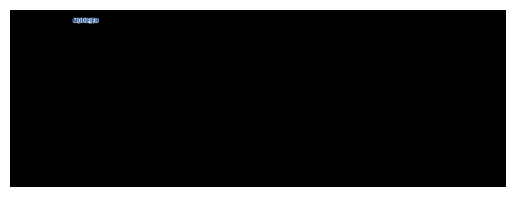

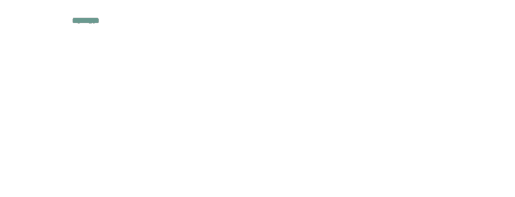

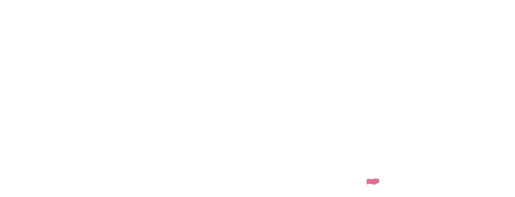

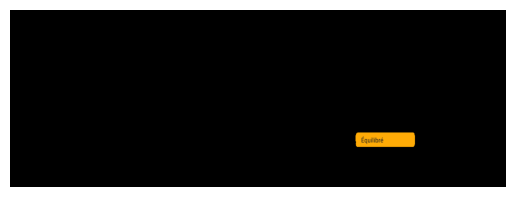

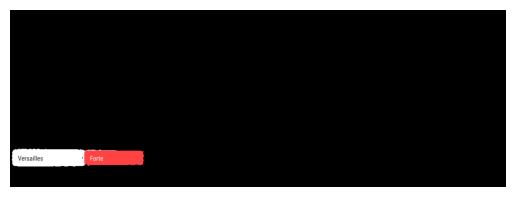

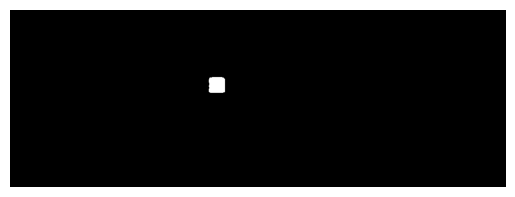

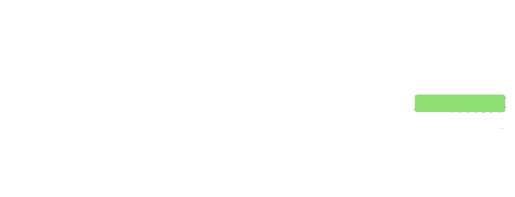

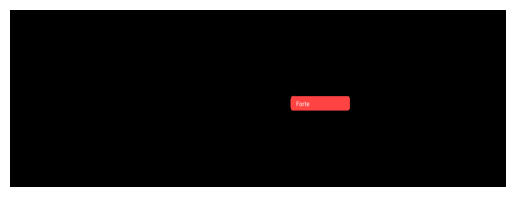

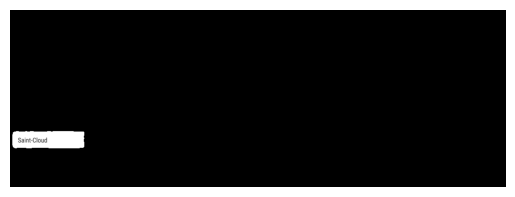

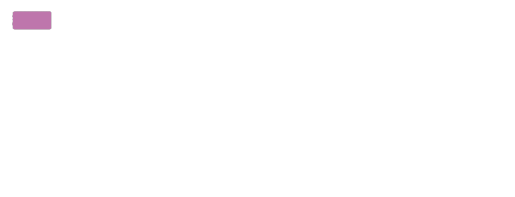

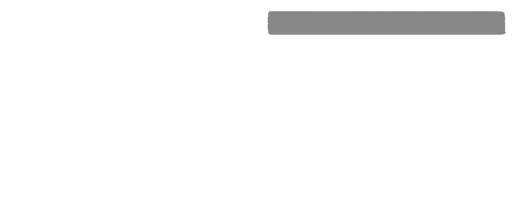

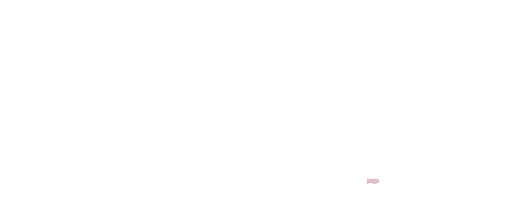

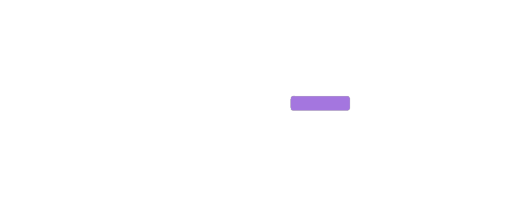

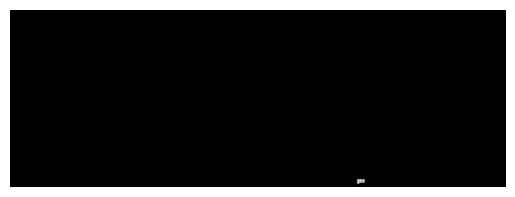

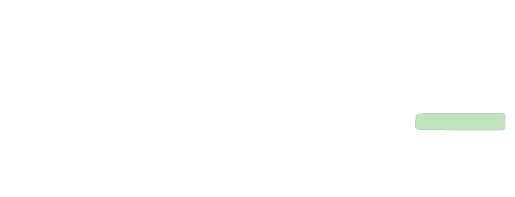

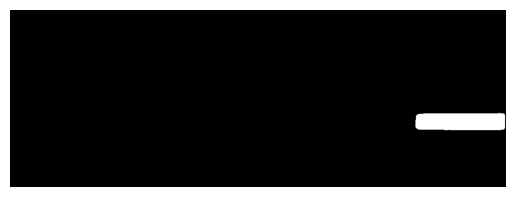

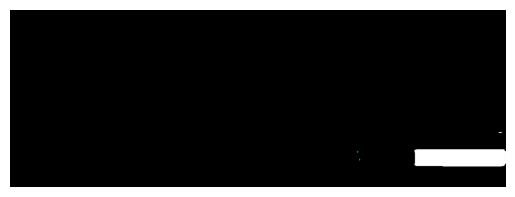

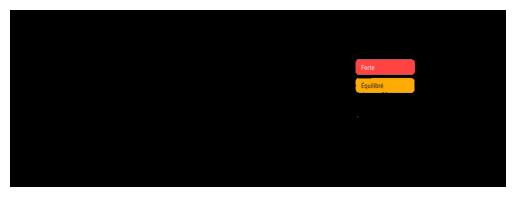

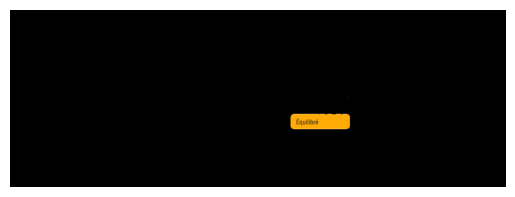

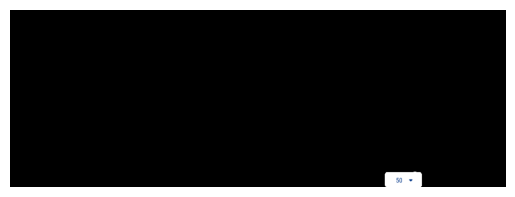

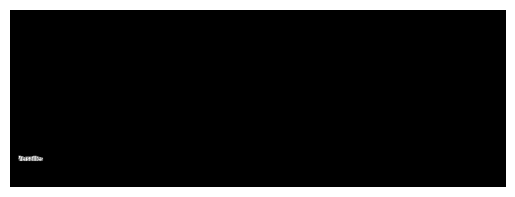

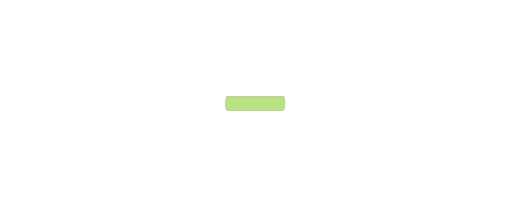

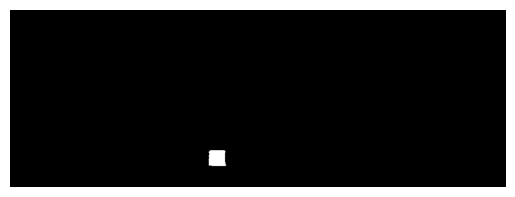

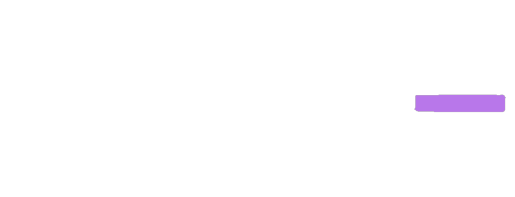

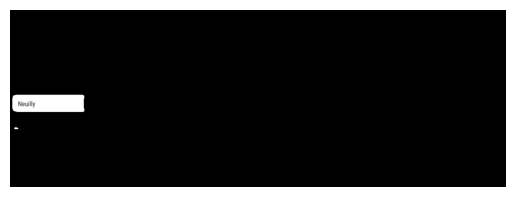

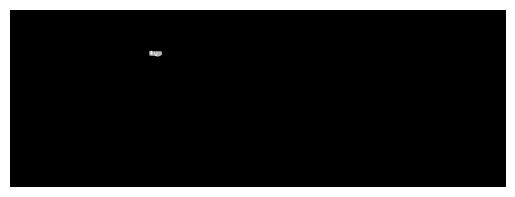

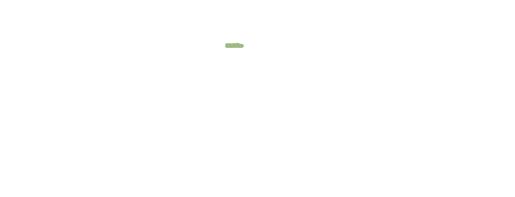

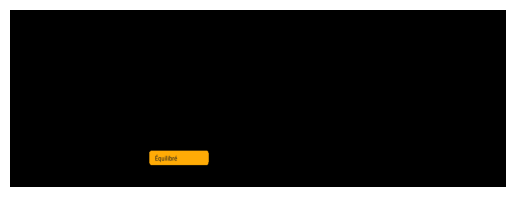

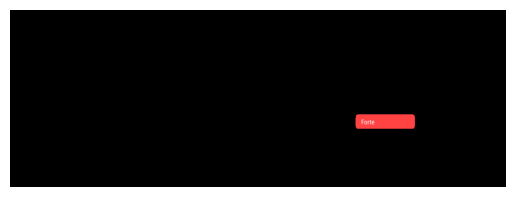

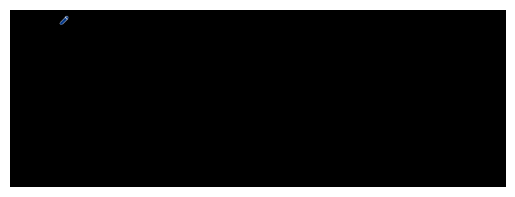

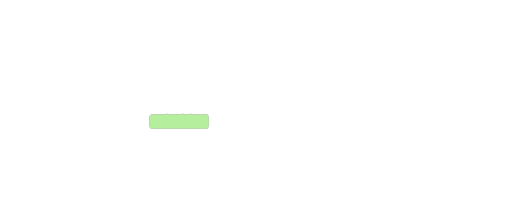

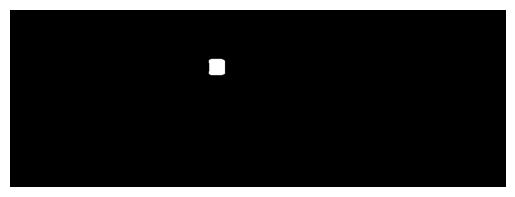

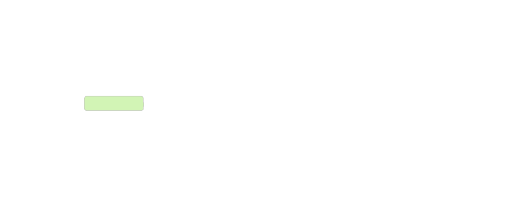

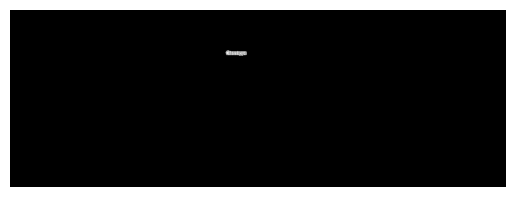

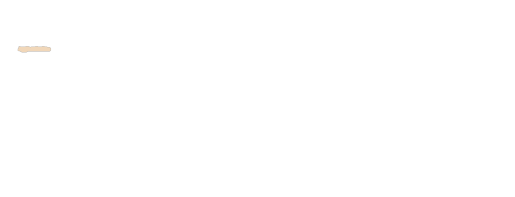

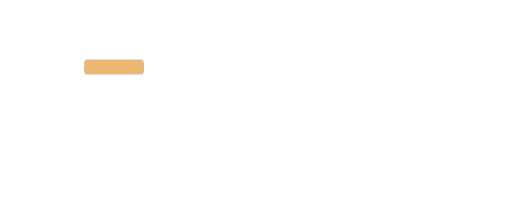

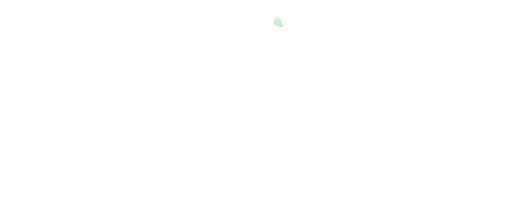

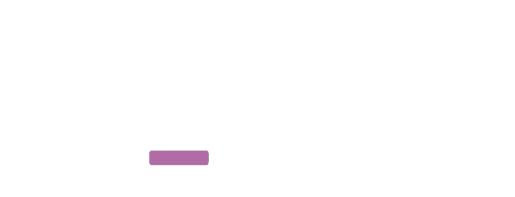

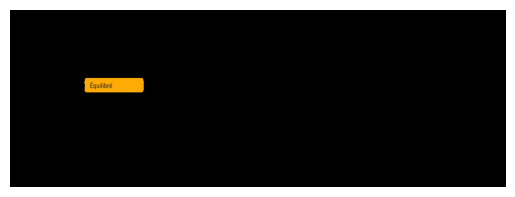

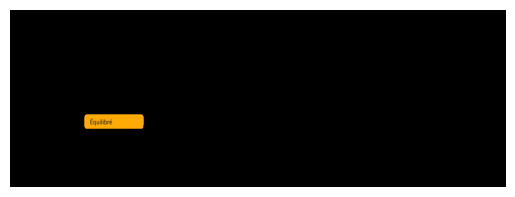

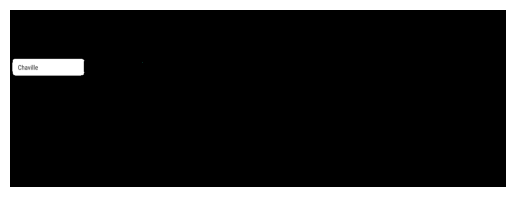

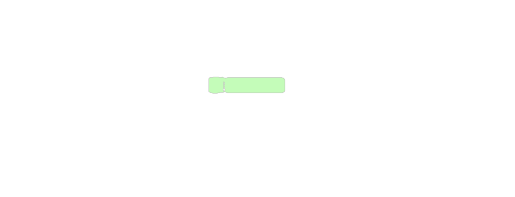

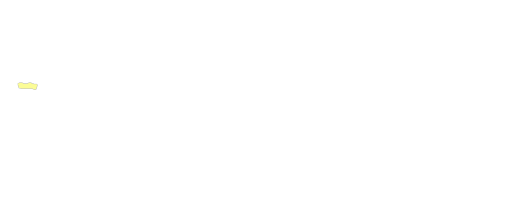

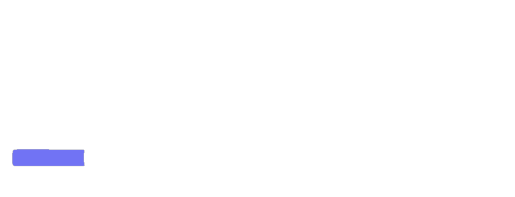

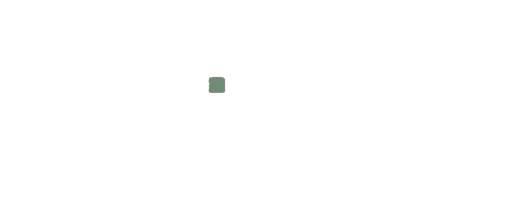

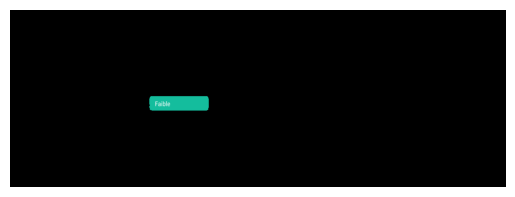

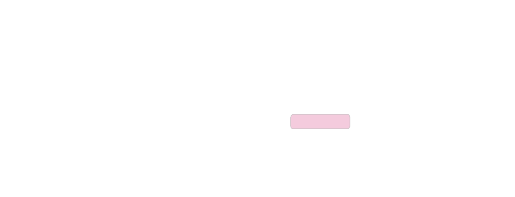

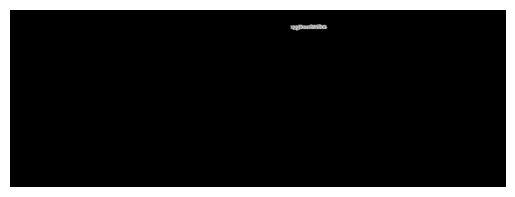

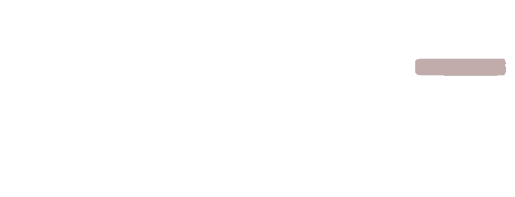

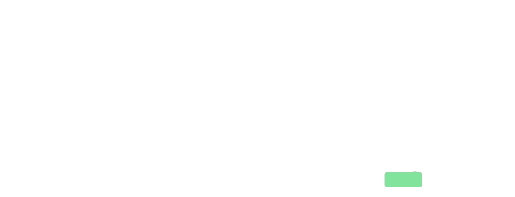

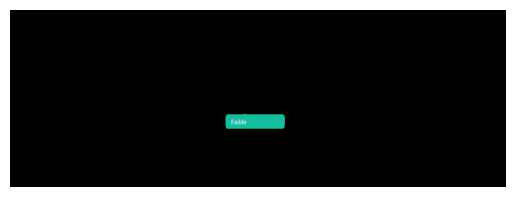

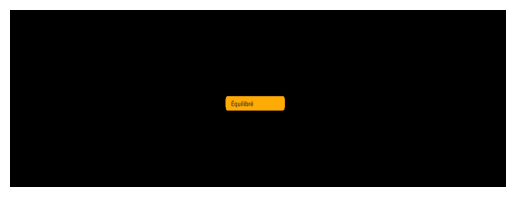

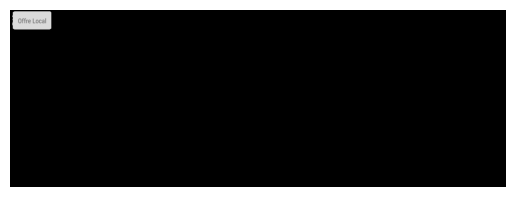

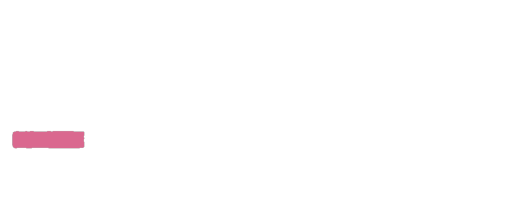

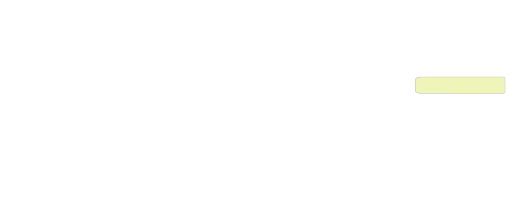

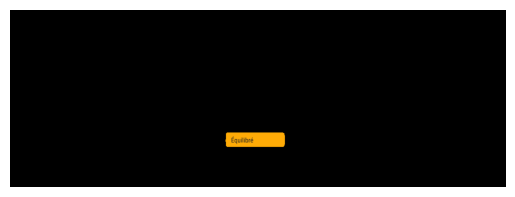

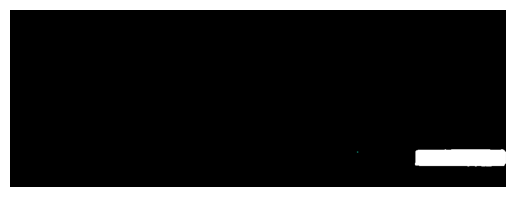

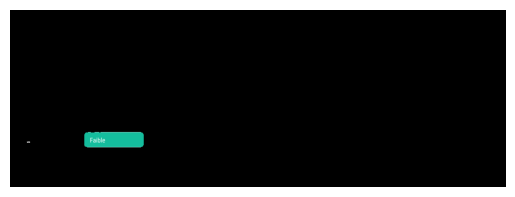

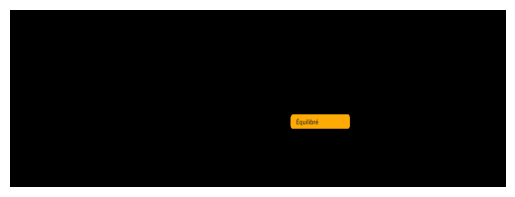

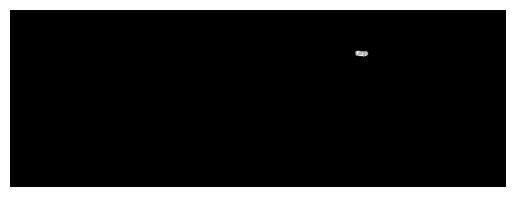

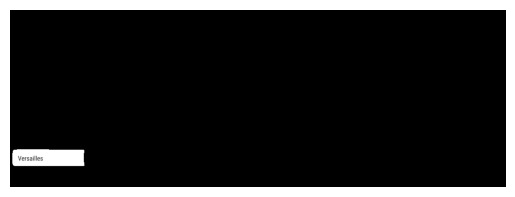

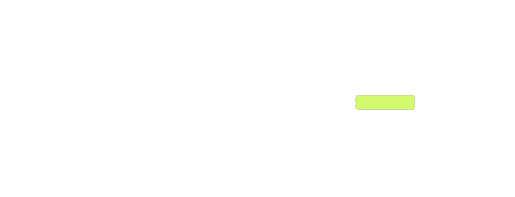

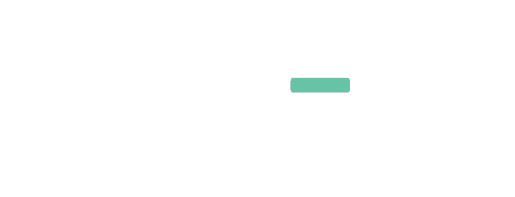

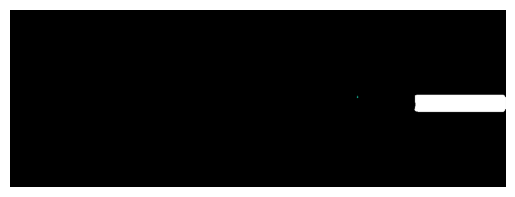

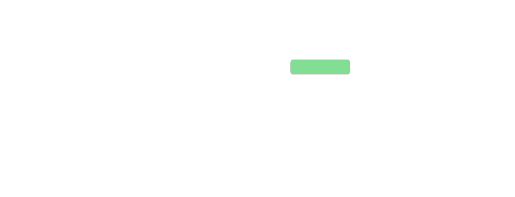

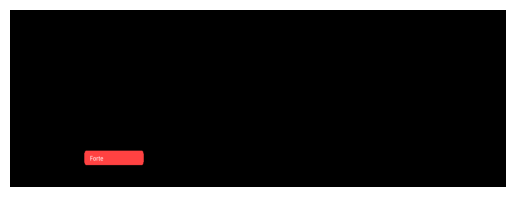

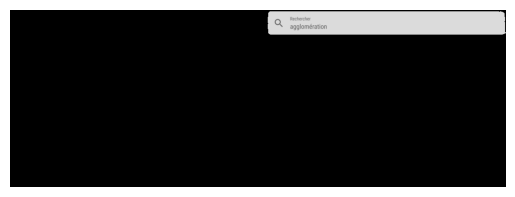

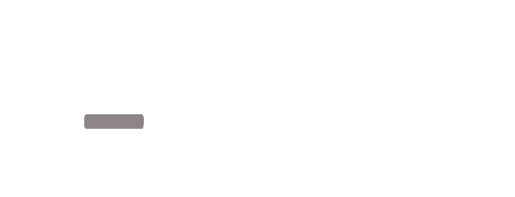

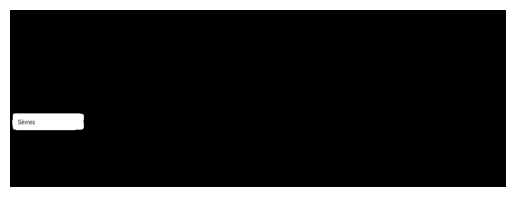

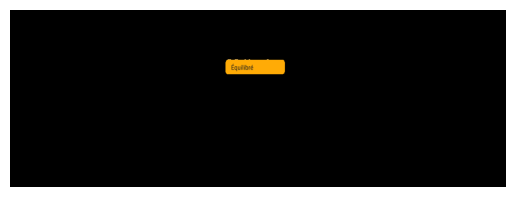

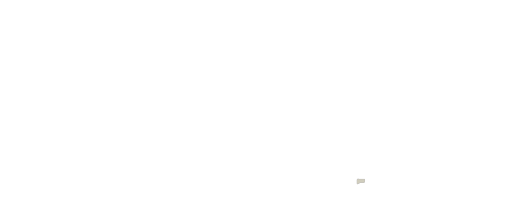

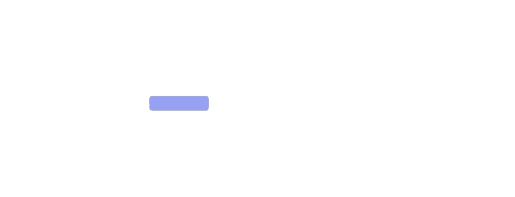

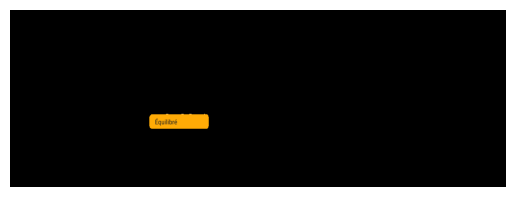

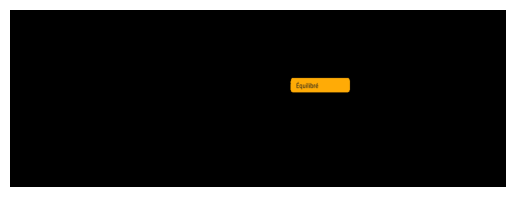

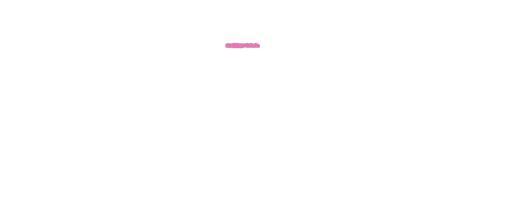

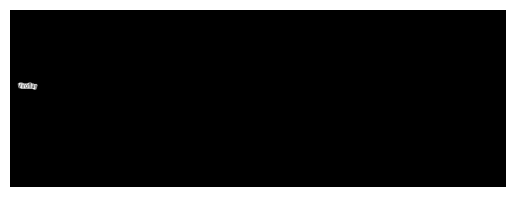

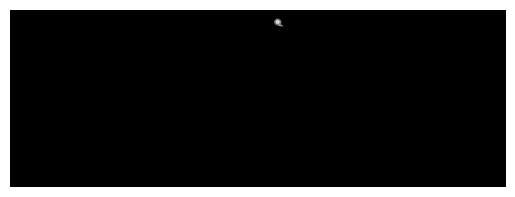

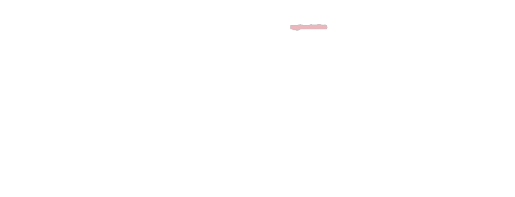

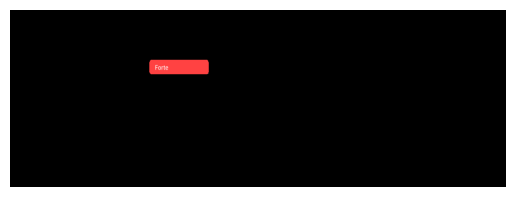

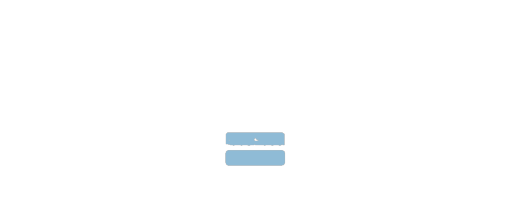

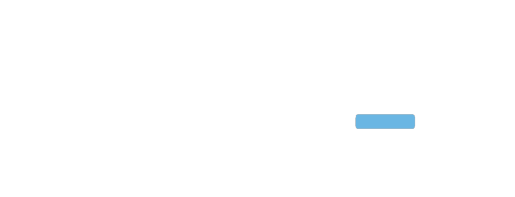

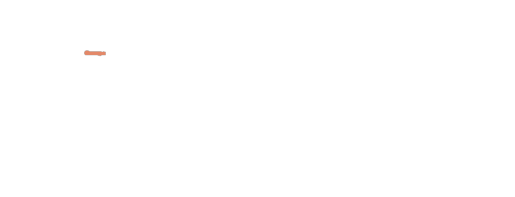

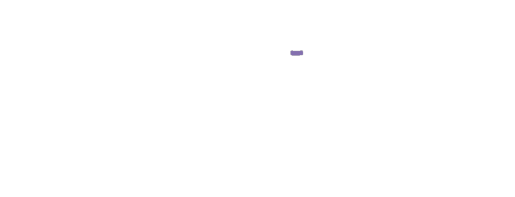

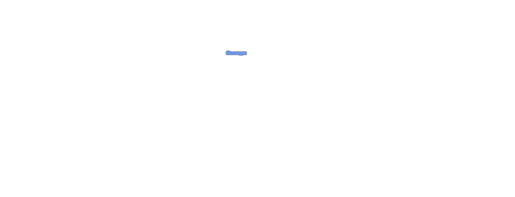

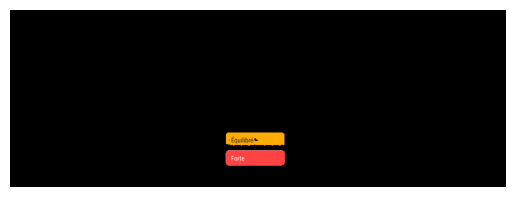

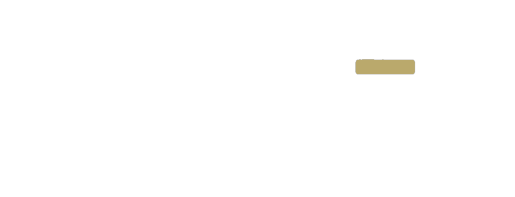

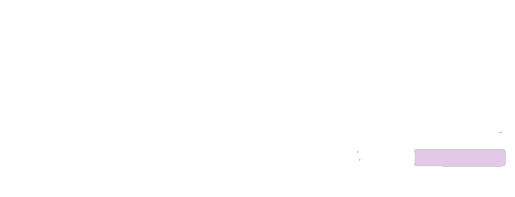

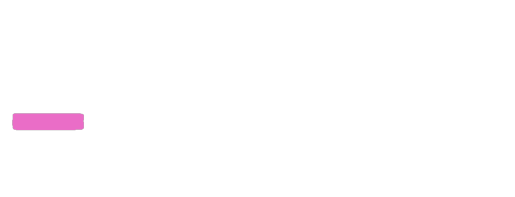

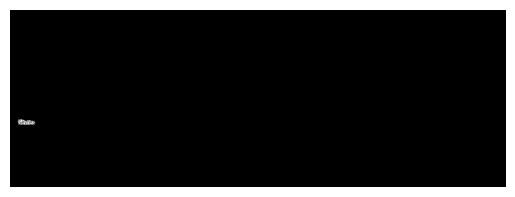

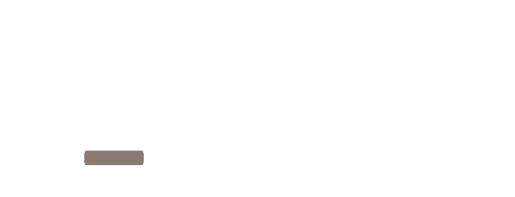

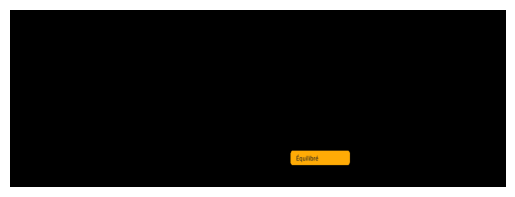

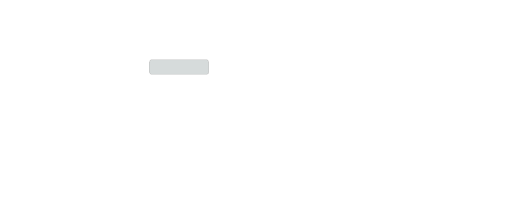

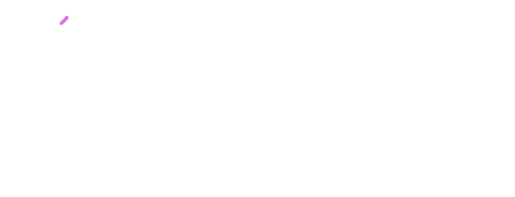

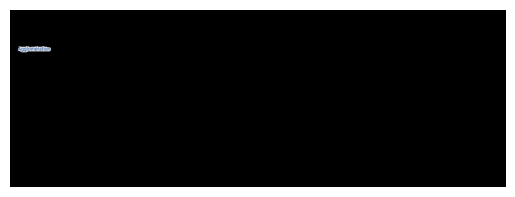

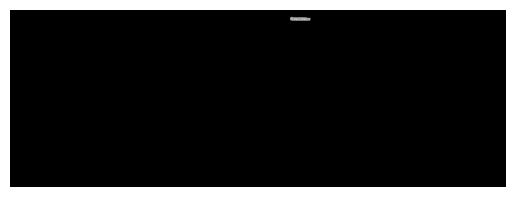

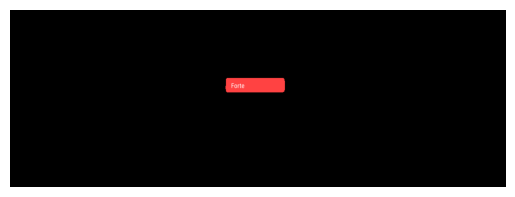

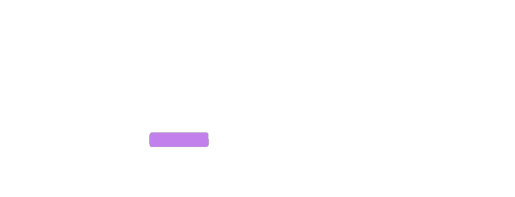

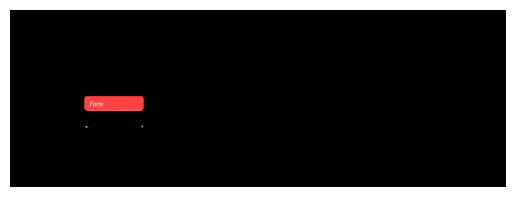

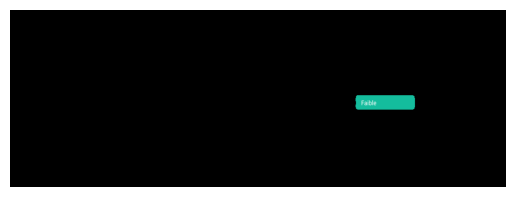

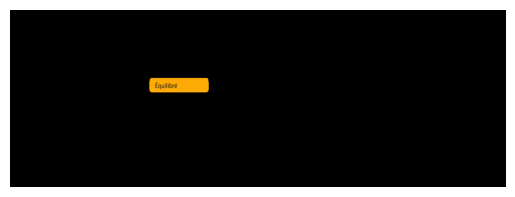

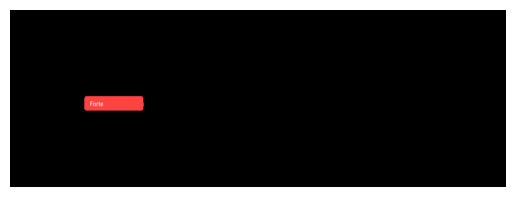

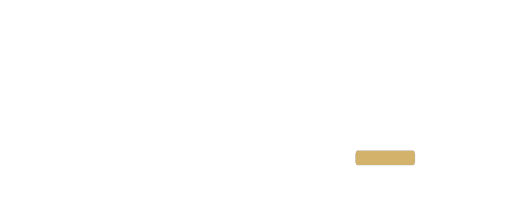

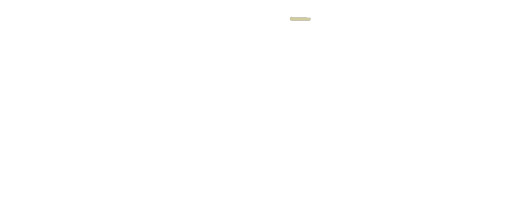

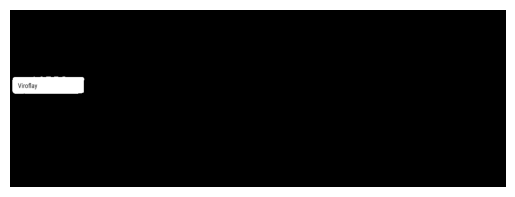

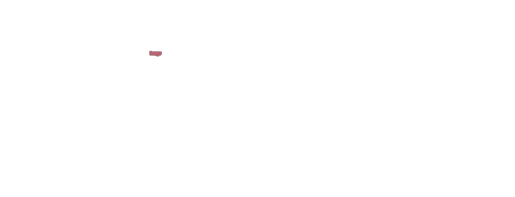

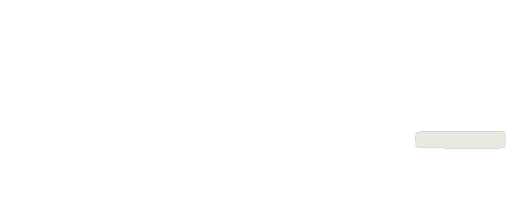

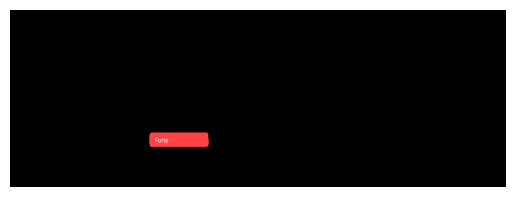

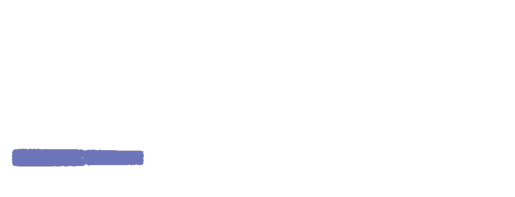

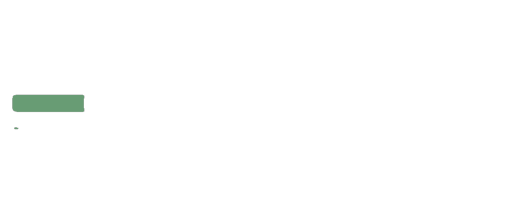

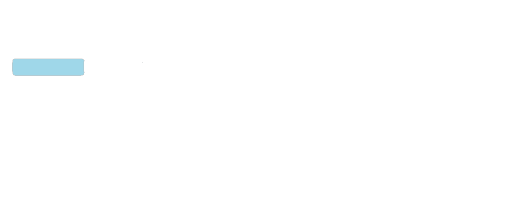

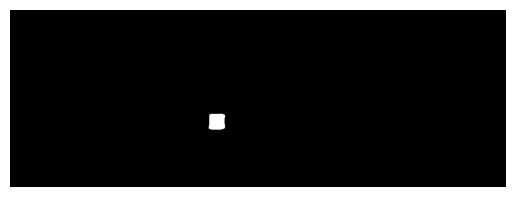

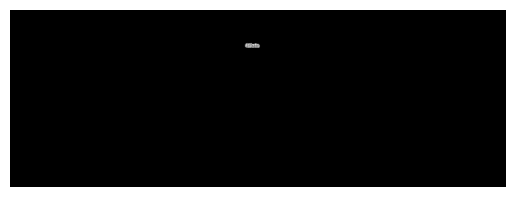

In [ ]:
mask_files = [os.path.join(masks_folder, f) for f in os.listdir(masks_folder) if f.endswith('.png')]

for mask_file in mask_files:
    mask_image = Image.open(mask_file)
    plt.figure()
    plt.imshow(mask_image)
    plt.axis('off')
    plt.show()
   
